name 'plot_dir' is not defined
failed to read stock data for ticker:  TSLA


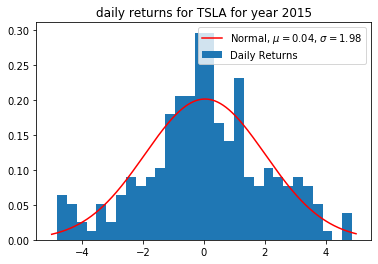

In [5]:
from pandas_datareader import data as web
import os
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

ticker='TSLA'

try:   
    df = pd.read_csv("TSLA.csv")
    df['Return'] = 100.0 * df['Return']
    year = '2015'
    start_date=year + '-01-01'; 
    end_date=year + '-12-31'
    df = df[df['Date'] >= start_date]
    df = df[df['Date'] <= end_date]
    low_return = -5
    high_return = 5
    df = df[(df['Return']>low_return) & (df['Return'] < high_return)]
    fig = plt.figure()
    returns_list = df['Return'].values
    plt.hist(returns_list, density=True, bins = 30, label='Daily Returns')
    x = np.linspace(low_return, high_return, 1000)
    pos = len(df[df['Return'] > 0])
    neg = len(df[df['Return'] < 0])
    ticker_mean = df['Return'].mean()
    ticker_std = df['Return'].std()

    plt.plot(x, norm.pdf(x, ticker_mean,ticker_std), color='red',
         label='Normal, ' + r'$\mu=$' + str(round(ticker_mean,2)) +  
         ', ' + r'$\sigma=$' + str(round(ticker_std,2)))
    plt.title('daily returns for ' + ticker +  ' for year ' +  year)
    plt.legend()
    output_file = os.path.join(plot_dir, 'returns_' + year + '_' + ticker + '_' + str(year) + '.pdf')
    plt.savefig(output_file)

    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)